In [1]:
# This Pandas script analyzes results of a clinical study involving a number of cancer treatments tested on rodents.
# 
# Results of these analyses are displayed using various graphs, produced to compare efficacy (change in tumor volume and
#   metastatic sites), toxicity (rodent survival rates) and effectiveness (total change in tumor size) over the course of study.
#
# Input data are two CSV files in sub-directory raw_data.
#
# Various code cells below contain additional comments on details of operations.

# Observations
1. Capomulin performed best among the four treatments analyzed: Capomulin, Infubinol, Ketapril, Placebo:
    - The only treatment that resulted in tumor volume reduction.
    - The fewest metastatic sites.
    - The lowest mortality rate.
2. Capomulin was the only treatment that resulted in total tumor volume reduction over the course of study.
3. All treatments were effective when compared to placebo since rodents receiving placebo:
    - Had the highest metastatic sites.
    - Had the highest tumor volume increase.
    - Toxicity is the only measure by which palcebo performed better than two out of three other treatments.

In [2]:
# Import various dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a reference to input CSV files
csv_path1 = "raw_data/clinicaltrial_data.csv"
csv_path2 = "raw_data/mouse_drug_data.csv"

# Read the CSV into Pandas DataFrame (data frame, df)
clinical_df = pd.read_csv(csv_path1)
mouse_df = pd.read_csv(csv_path2)
# Merge the two data sets into a single data frame total_df
total_df = pd.merge(clinical_df, mouse_df, on='Mouse ID')
total_df = total_df.rename(columns={'Mouse ID':'MouseID', 'Tumor Volume (mm3)':'TumorVolume', 'Metastatic Sites':'MetasSite'})
total_df.head(20)

,MouseID,Timepoint,TumorVolume,MetasSite,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Display tumor volume change over time

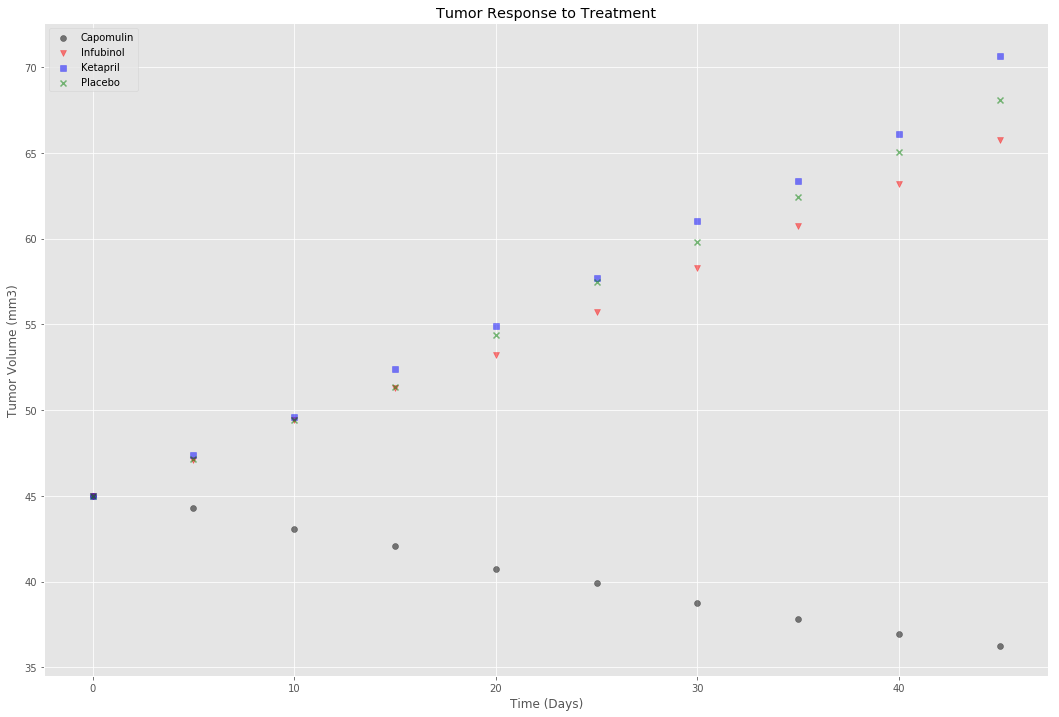

In [16]:
# Initialize some global variables 
x = [0,5,10,15,20,25,30,35,40,45] # x-axis corresponds to days into experiment period (days)
drugs = {}                        # dictionary used to track treatment/drug specific info; index treatment name, value data frame
total_vol_change = {}             # dictionary used in a subsequnet cell block; index treatment name, value float
treatments_to_report = ['Capomulin','Infubinol', 'Ketapril', 'Placebo']
# Set graph style to ggplot and set figure size
plt.style.use('ggplot')
plt.figure(figsize=(18,12))

for i in treatments_to_report:                        # for each treatment being analyzed:
    drugs[i] = total_df.loc[total_df['Drug'] == i, :] #    store all treatment specific info in a df
    time_grouping = drugs[i].groupby('Timepoint')     #    groupby the resulting df by Timepoint to
    avg_tumor_size = time_grouping['TumorVolume'].mean() # calculate average tumor volume at each reporting day
    # Calculate total tumor volume change using average tumor size on days 0 and 45 (final day) and store for later use
    total_vol_change[i] = (avg_tumor_size[45]-avg_tumor_size[0])/avg_tumor_size[0]*100
    if i == 'Capomulin':
        mark = 'o'
        color = 'black'
    elif i == 'Infubinol': 
        mark = 'v'
        color = 'red'
    elif i == 'Ketapril':
        mark = 's'
        color = 'blue'
    else:
        mark = 'x'
        color = 'green'
    # scatter plot tumor volume change over the course of study
    plt.scatter(x,avg_tumor_size,label=i, marker=mark, c=color, alpha=0.5)

# Add a legend and display the final scatter plot
plt.legend()
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.show()

-19.4753026667
46.1234717284
57.0287946848
51.2979604848


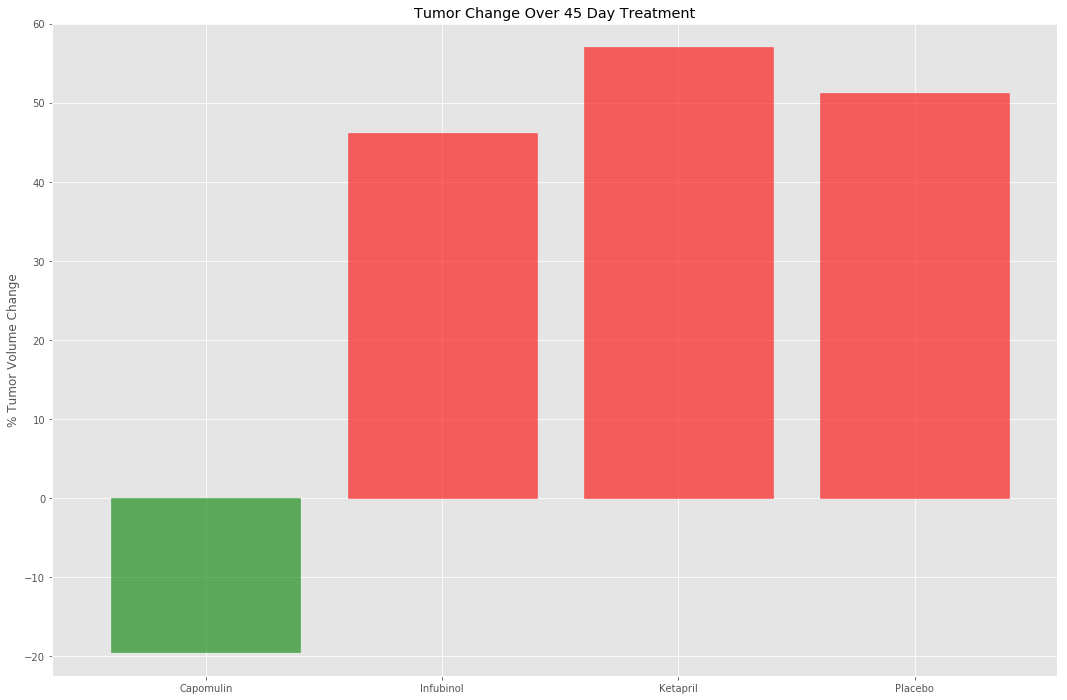

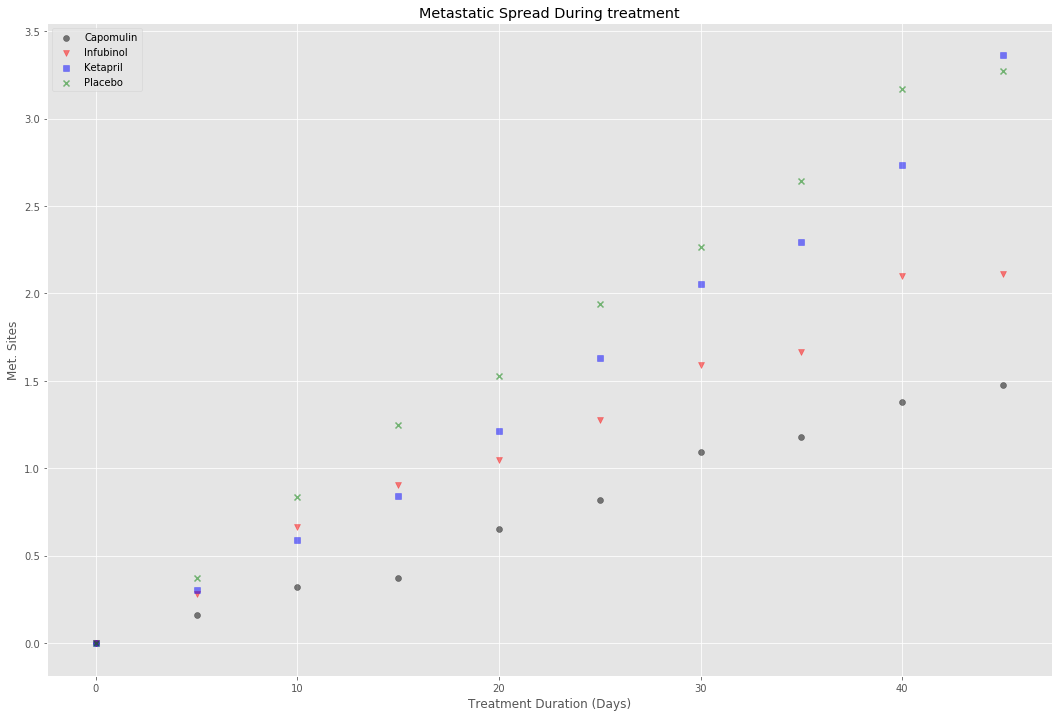

In [17]:
plt.figure(figsize=(18,12))

for i in treatments_to_report:                        # for each treatment being analyzed:
    drugs[i] = total_df.loc[total_df['Drug'] == i, :] #    store all treatment specific info in a df
    time_grouping = drugs[i].groupby('Timepoint')     #    groupby the resulting df by Timepoint to
    avg_metastics = time_grouping['MetasSite'].mean() # calculate metastatic sites at each reporting day
    if i == 'Capomulin':
        mark = 'o'
        color = 'black'
    elif i == 'Infubinol': 
        mark = 'v'
        color = 'red'
    elif i == 'Ketapril':
        mark = 's'
        color = 'blue'
    else:
        mark = 'x'
        color = 'green'
    # scatter plot tumor volume change over the course of study
    plt.scatter(x, avg_metastics, label=i, marker=mark, c=color, alpha=0.5)

# Add a legend and display the final scatter plot
plt.legend()
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During treatment')
plt.show()

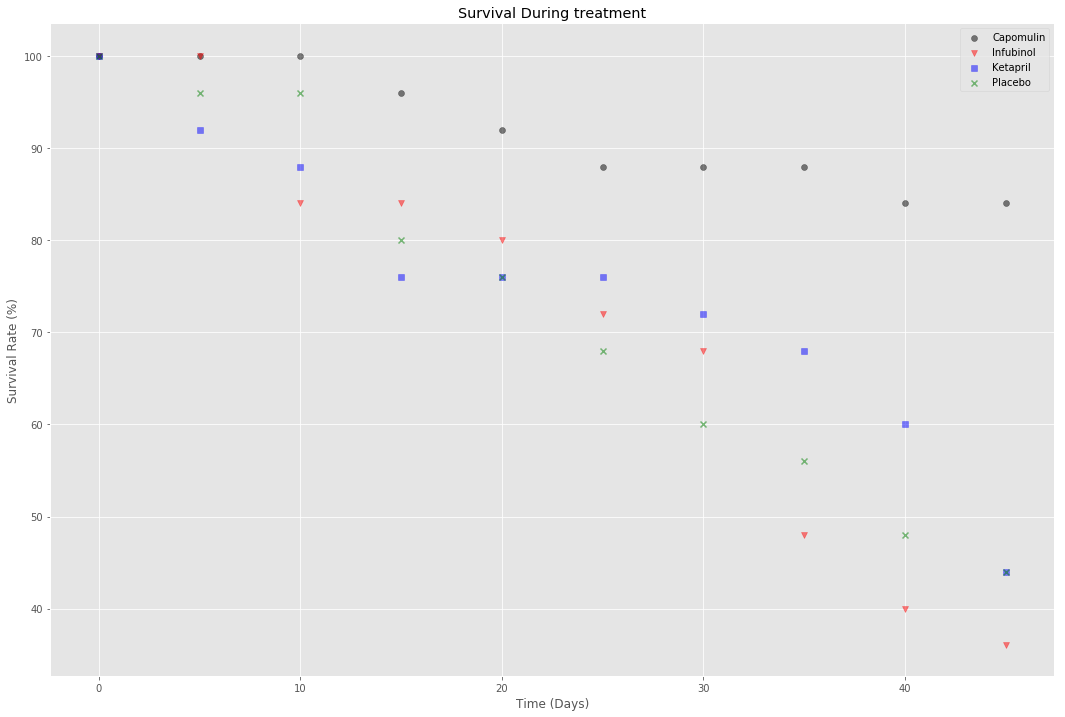

In [19]:
plt.figure(figsize=(18,12))

for i in treatments_to_report:                        # for each treatment being analyzed:
    drugs[i] = total_df.loc[total_df['Drug'] == i, :] #    store all treatment specific info in a df
    time_grouping = drugs[i].groupby('Timepoint')     #    groupby the resulting df by Timepoint to
    num_mice = time_grouping['MouseID'].count()       #    calculate number of mice still alive at each time point
    if i == 'Capomulin':
        mark = 'o'
        color = 'black'
    elif i == 'Infubinol': 
        mark = 'v'
        color = 'red'
    elif i == 'Ketapril':
        mark = 's'
        color = 'blue'
    else:
        mark = 'x'
        color = 'green'
    survival = []       # reset the list used to hold calculated survival rate in the loop below
    for j in x: survival.append(num_mice[j]/num_mice[0]*100)
    # scatter plot survial rate over the course of study
    plt.scatter(x, survival, label=i, marker=mark, c=color, alpha=0.5)

# Add a legend, set axes labels and graph title; display the plot
plt.legend()
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During treatment')
plt.show()

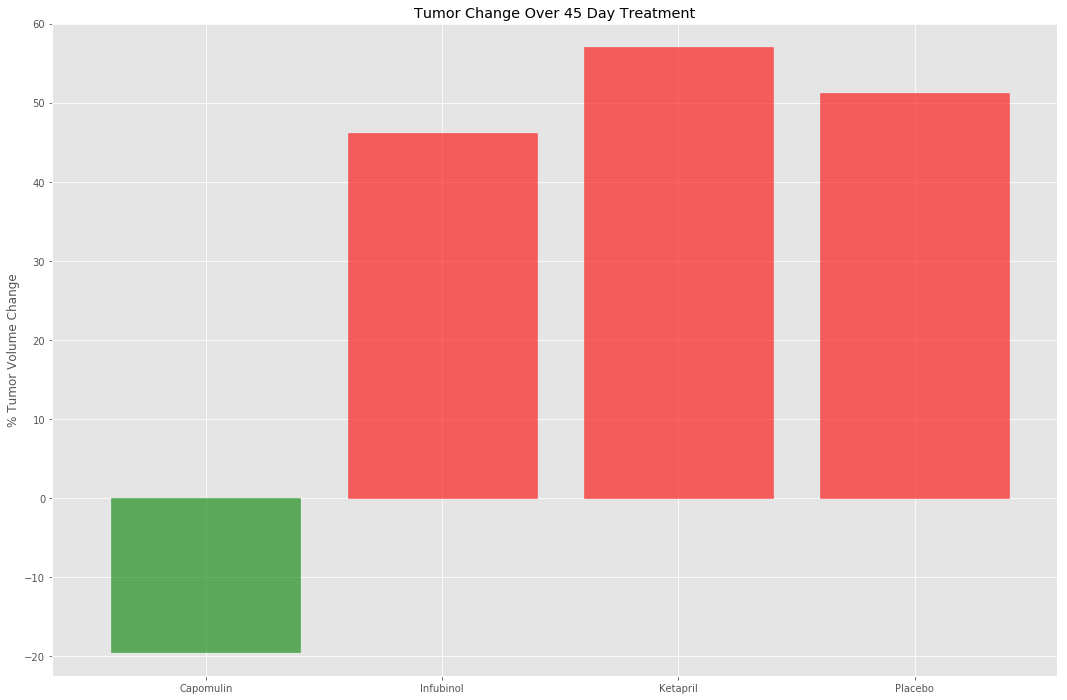

In [20]:
plt.figure(figsize=(18,12))

x_axis = np.arange(len(total_vol_change))
vol_change = []
for i in range(len(treatments_to_report)): vol_change.append(total_vol_change[treatments_to_report[i]])
barchart = plt.bar(x_axis, vol_change, alpha=0.6, align="edge")
for i in range(len(treatments_to_report)):
    if vol_change[i] > 0: barchart[i].set_color('red')
    else: barchart[i].set_color('green')

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, treatments_to_report)
plt.xlim(-0.25, len(x_axis))

plt.ylim (min(vol_change)-3, max(vol_change)+3)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.show()